<a href="https://colab.research.google.com/github/DatumLearning/YOLOv8_Segmentation_image/blob/main/yolo_seg_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YOLOv8_Segmentation_image**


In [1]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.4/659.4 kB 9.8 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
model = YOLO("yolov8m-seg.pt")

100%|██████████| 52.4M/52.4M [00:00<00:00, 224MB/s]


In [4]:
predict = model.predict("/content/doggo.jpg" , save = True , save_txt = True)


image 1/1 /content/doggo.jpg: 480x640 1 bicycle, 1 truck, 1 dog, 1786.5ms
Speed: 21.4ms preprocess, 1786.5ms inference, 46.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels


In [ ]:
predict[0].names

In [38]:
predict

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [17]:
predict[0].masks.data

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [15]:
predict[0].masks.data.shape

torch.Size([3, 480, 640])

In [10]:
predict[0].masks.data[0].unique()

tensor([0., 1.])

In [18]:
H , W , _ = cv2.imread("/content/doggo.jpg").shape

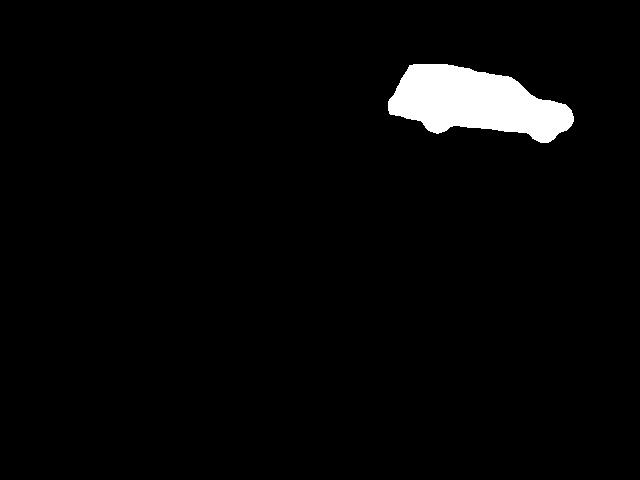

In [23]:
cv2_imshow((predict[0].masks.data[2].numpy() * 255).astype("uint8"))

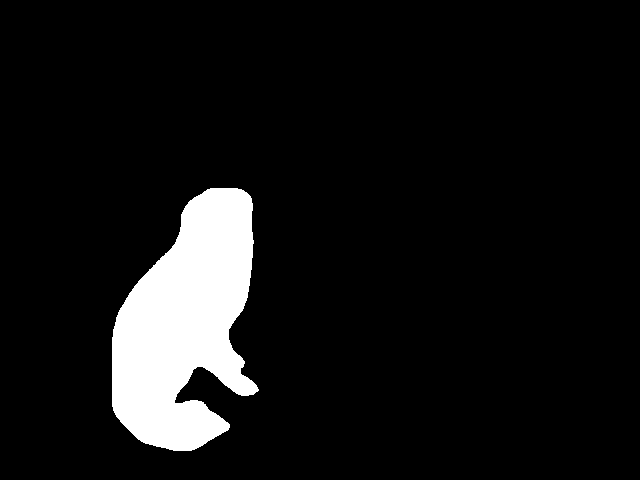

In [35]:
cv2_imshow((predict[0].masks.data[1].numpy() * 255).astype("uint8"))

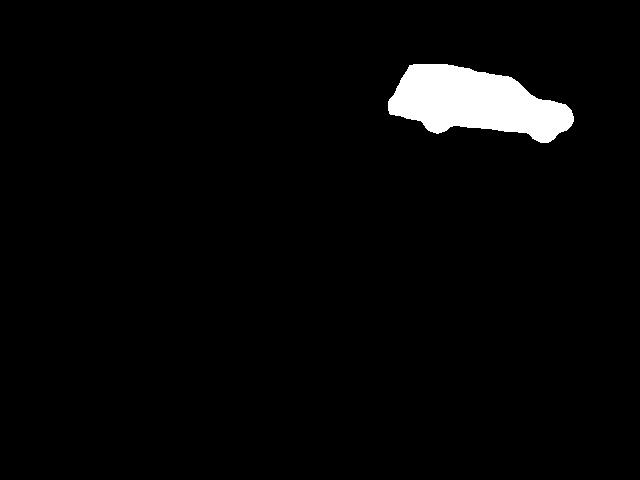

In [ ]:
cv2_imshow((predict[0].masks.masks[2].numpy() * 255).astype("uint8"))

In [29]:
x = (predict[0].masks.xy[2][: , 0].astype('int'))
y = (predict[0].masks.xy[2][: , 1].astype('int'))

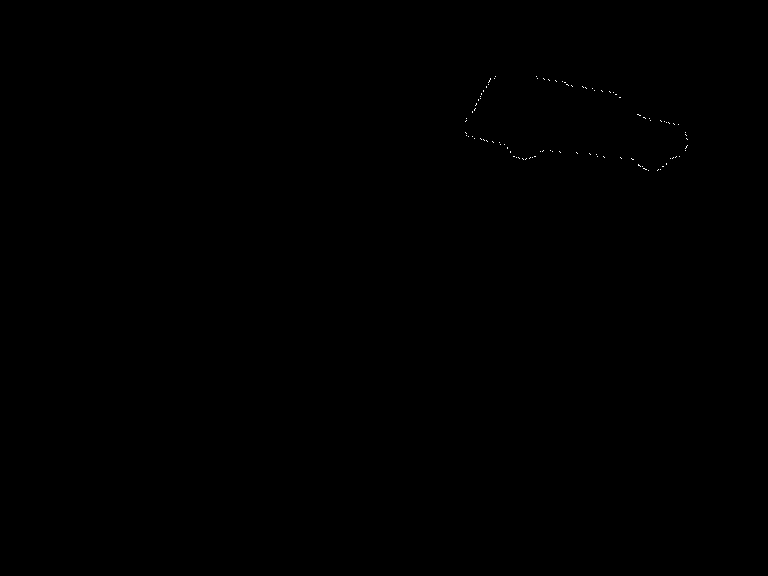

In [30]:
blk = np.zeros((H , W))
blk[y , x] = 255
cv2_imshow(blk.astype("uint8"))

In [31]:
outs = open("/content/runs/segment/predict/labels/doggo.txt" , "r").readlines()

In [55]:
for dt in outs:
  print(int(dt.split()[0]) , predict[0].names.get(int(dt.split()[0])))

1 bicycle
16 dog
7 truck
